# Airbnb Data Analysis Project

This notebook explores the Airbnb Open Data to gain insights into various aspects of listings in New York City.

## 1️⃣ Import Required Libraries
This section imports all the necessary Python libraries for data manipulation, analysis, and visualization.


In [43]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# For better display options
pd.set_option('display.max_columns', None)

## 2️⃣ Load the Dataset
Here, we load the Airbnb dataset from an Excel file into a pandas DataFrame and display the initial shape and a preview of the data.


In [45]:
#  Load the Dataset
df = pd.read_excel("Airbnb_Open_Data.xlsx")
print("Initial Data Shape:", df.shape)
print(df.head())

Initial Data Shape: (102599, 26)
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code  instant_bookable  \


## 3️⃣ Data Cleaning

This section focuses on cleaning the dataset by handling duplicates, dropping irrelevant columns, cleaning cost columns, dealing with missing values, correcting data types, fixing spelling errors, and removing outliers.

In [46]:
#  Data Cleaning

# Step 1: Check for duplicates
print("\nDuplicate Records:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate Records: 541


In [47]:
# Step 2: Drop irrelevant columns
cols_to_drop = ['house_rules', 'license']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

In [48]:
# Step 3: Remove dollar signs and commas in cost columns
cost_columns = ['price', 'service_fee']
for col in cost_columns:
    if col in df.columns:
        df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-353466387.py:5: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [49]:
# Step 4: Drop missing values
df = df.dropna()
print("\nData Shape After Dropping Missing Values:", df.shape)


Data Shape After Dropping Missing Values: (83390, 24)


In [50]:
# Step 5: Fix incorrect data types
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [51]:
# Step 6: Correct spelling error 'Brookln' -> 'Brooklyn'
if 'neighbourhood_group' in df.columns:
    df['neighbourhood_group'] = df['neighbourhood_group'].replace('Brookln', 'Brooklyn')

In [52]:
# Step 7: Remove outliers in availability_365
if 'availability_365' in df.columns:
    q1 = df['availability_365'].quantile(0.25)
    q3 = df['availability_365'].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df = df[(df['availability_365'] >= lower) & (df['availability_365'] <= upper)]

## 4️⃣ Exploratory Data Analysis (EDA)

In this section, we perform exploratory data analysis to understand the basic characteristics of the dataset, including data types, summary statistics, and initial visualizations.

In [53]:
# Exploratory Data Analysis (EDA)
print("\nBasic Info:")
print(df.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  int64         
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  int64         
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object       

In [54]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                  id                            NAME       host id  \
count   8.339000e+04                           83390  8.339000e+04   
unique           NaN                           50533           NaN   
top              NaN  Water View King Bed Hotel Room           NaN   
freq             NaN                              25           NaN   
mean    2.957603e+07                             NaN  4.918237e+10   
min     1.001254e+06                             NaN  1.236005e+08   
25%     1.541650e+07                             NaN  2.444739e+10   
50%     3.075788e+07                             NaN  4.902330e+10   
75%     4.331842e+07                             NaN  7.384753e+10   
max     5.735803e+07                             NaN  9.876313e+10   
std     1.621851e+07                             NaN  2.853533e+10   

       host_identity_verified host name neighbourhood group  \
count                   83390     83390               83390   
unique      

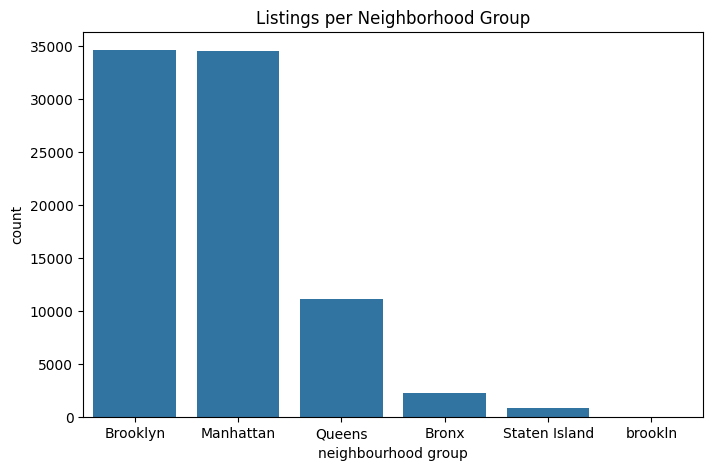

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood group', data=df,
              order=df['neighbourhood group'].value_counts().index)
plt.title('Listings per Neighborhood Group')
plt.show()

## 5️⃣ Questions and Answers

This section addresses specific questions about the Airbnb data through analysis and visualizations.

🧱 Different Property Types in Dataset:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


/tmp/ipython-input-2292080902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index[:10], palette='viridis')


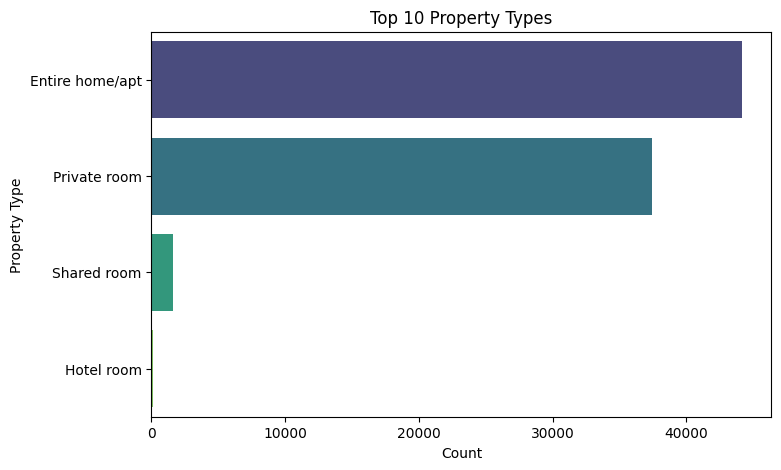

In [56]:
# Q1. Different property types in dataset
if 'room type' in df.columns:
    print("🧱 Different Property Types in Dataset:")
    print(df['room type'].unique())
    plt.figure(figsize=(8,5))
    sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index[:10], palette='viridis')
    plt.title('Top 10 Property Types')
    plt.xlabel('Count')
    plt.ylabel('Property Type')
    plt.show()
else:
    print("Column 'room type' not found in dataset.")

🏙️ Neighborhood Group Listing Counts:
 neighbourhood group
Brooklyn         34621
Manhattan        34561
Queens           11124
Bronx             2267
Staten Island      816
brookln              1
Name: count, dtype: int64

Neighborhood Group with Highest Listings: Brooklyn


/tmp/ipython-input-4267043461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listings_count.index, y=listings_count.values, palette='coolwarm')


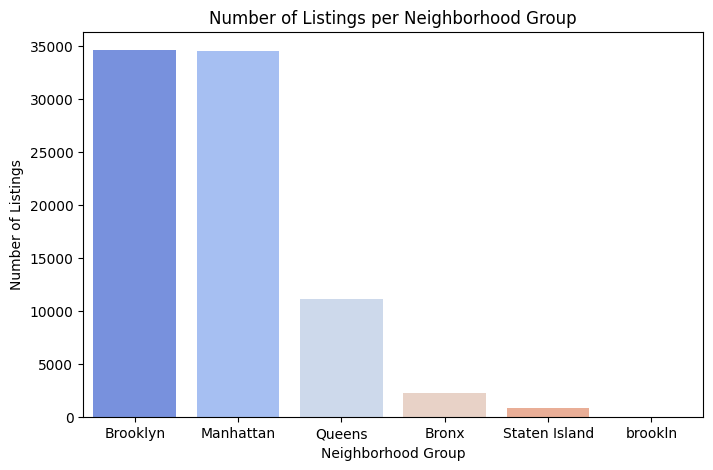

In [57]:
# Q2. Neighborhood group with the highest number of listings
if 'neighbourhood group' in df.columns:
    listings_count = df['neighbourhood group'].value_counts()
    print("🏙️ Neighborhood Group Listing Counts:\n", listings_count)
    print("\nNeighborhood Group with Highest Listings:", listings_count.idxmax())

    plt.figure(figsize=(8,5))
    sns.barplot(x=listings_count.index, y=listings_count.values, palette='coolwarm')
    plt.title('Number of Listings per Neighborhood Group')
    plt.xlabel('Neighborhood Group')
    plt.ylabel('Number of Listings')
    plt.show()
else:
    print("Column 'neighbourhood group' not found.")

💰 Average Price by Neighborhood Group:
 neighbourhood group
Queens           630.502517
Bronx            630.201147
Brooklyn         627.435632
Manhattan        623.451839
Staten Island    622.132353
brookln          580.000000
Name: price, dtype: float64

Highest Average Price Neighborhood: Queens


/tmp/ipython-input-2588776216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='magma')


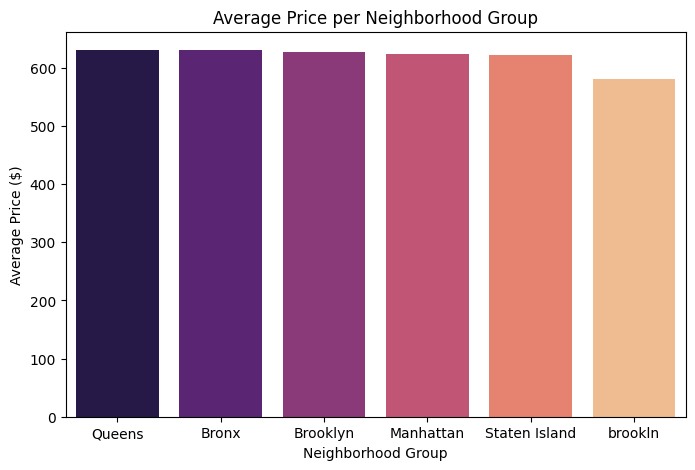

In [58]:
# Q3. Neighborhood group with highest average prices
if {'neighbourhood group', 'price'}.issubset(df.columns):
    avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
    print("💰 Average Price by Neighborhood Group:\n", avg_price)
    print("\nHighest Average Price Neighborhood:", avg_price.idxmax())

    plt.figure(figsize=(8,5))
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='magma')
    plt.title('Average Price per Neighborhood Group')
    plt.xlabel('Neighborhood Group')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Required columns not found.")

🏗️ Correlation between Construction Year and Price: -0.004


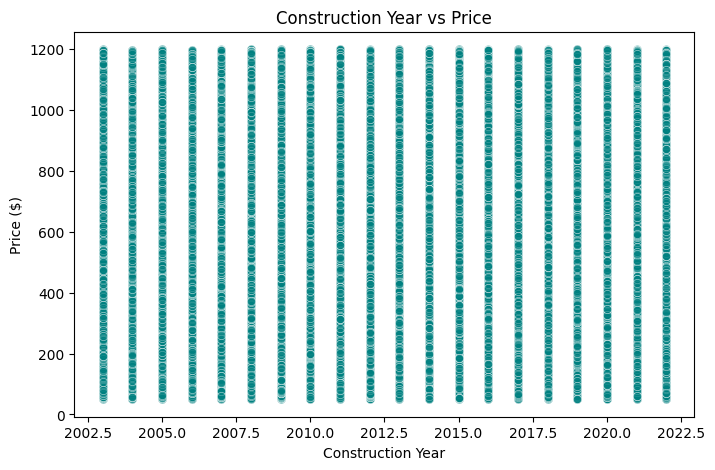

In [59]:
# Q4. Relationship between construction year and price
if {'Construction year', 'price'}.issubset(df.columns):
    corr = df['Construction year'].corr(df['price'])
    print("🏗️ Correlation between Construction Year and Price:", round(corr, 3))

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Construction year', y='price', data=df, alpha=0.6, color='teal')
    plt.title('Construction Year vs Price')
    plt.xlabel('Construction Year')
    plt.ylabel('Price ($)')
    plt.show()
else:
    print("Columns 'Construction year' or 'price' not found in dataset.")

👤 Top 10 Hosts by Listing Count:
 host id
56457739998    1
80014485718    1
52335172823    1
92037596077    1
45498551794    1
90821839709    1
79384379533    1
75527839483    1
1280143094     1
18824631834    1
Name: count, dtype: int64


/tmp/ipython-input-489301418.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values, palette='crest')


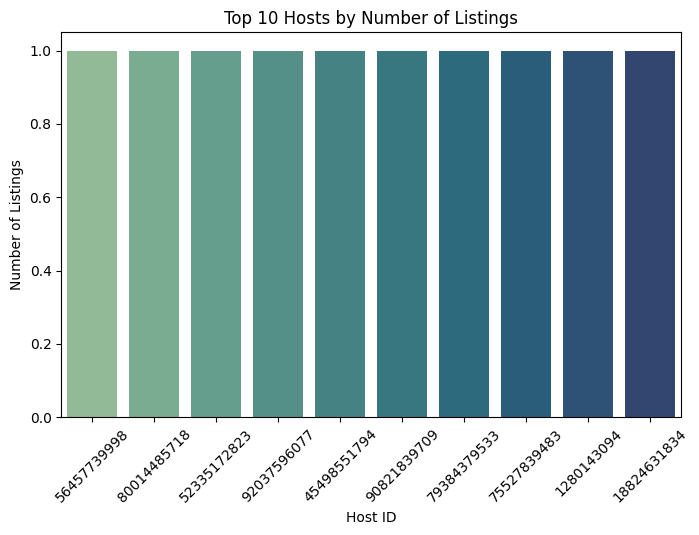

In [60]:
# Q5. Top 10 hosts by calculated host listing count
if 'host id' in df.columns:
    top_hosts = df['host id'].value_counts().head(10)
    print("👤 Top 10 Hosts by Listing Count:\n", top_hosts)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values, palette='crest')
    plt.title('Top 10 Hosts by Number of Listings')
    plt.xlabel('Host ID')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'host id' not found in dataset.")

⭐ Average Review Score (Verified): 3.28
⭐ Average Review Score (Unverified): 3.27


/tmp/ipython-input-1361014477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Verified', 'Unverified'], y=[verified_avg, unverified_avg], palette='pastel')


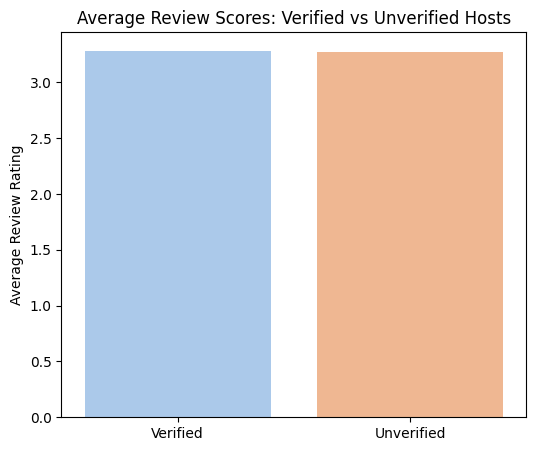

In [61]:
# Q6. Hosts with verified identities more likely to receive positive reviews
if {'host_identity_verified', 'review rate number'}.issubset(df.columns):
    verified_avg = df[df['host_identity_verified'] == 'verified']['review rate number'].mean()
    unverified_avg = df[df['host_identity_verified'] == 'unconfirmed']['review rate number'].mean()
    print("⭐ Average Review Score (Verified):", round(verified_avg, 2))
    print("⭐ Average Review Score (Unverified):", round(unverified_avg, 2))

    plt.figure(figsize=(6,5))
    sns.barplot(x=['Verified', 'Unverified'], y=[verified_avg, unverified_avg], palette='pastel')
    plt.title('Average Review Scores: Verified vs Unverified Hosts')
    plt.ylabel('Average Review Rating')
    plt.show()
else:
    print("Columns 'host_identity_verified' or 'review rate number' not found.")

💵 Correlation between Price and Service Fee: 1.0


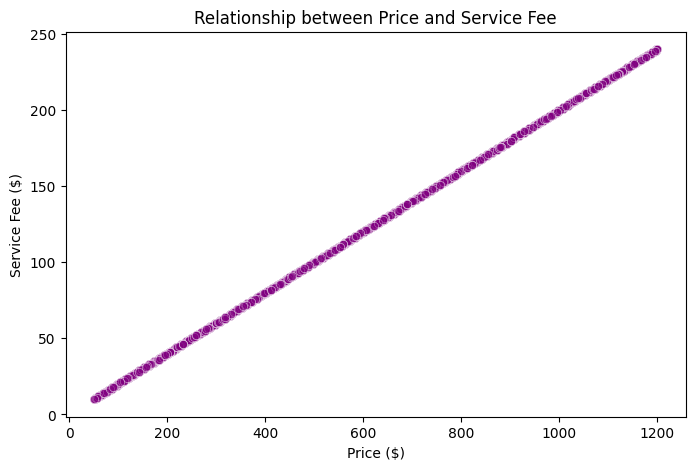

In [62]:
# Q7. Correlation between price and service fee
if {'price', 'service fee'}.issubset(df.columns):
    corr = df['price'].corr(df['service fee'])
    print("💵 Correlation between Price and Service Fee:", round(corr, 3))

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='price', y='service fee', data=df, alpha=0.6, color='purple')
    plt.title('Relationship between Price and Service Fee')
    plt.xlabel('Price ($)')
    plt.ylabel('Service Fee ($)')
    plt.show()
else:
    print("Columns 'price' or 'service fee' not found.")

🛏️ Average Review Rating by Neighborhood Group and Room Type:

   neighbourhood group        room type  review rate number
0                Bronx  Entire home/apt            3.381881
1                Bronx     Private room            3.305810
2                Bronx      Shared room            3.356322
3             Brooklyn  Entire home/apt            3.242491
4             Brooklyn       Hotel room            3.833333
5             Brooklyn     Private room            3.274728
6             Brooklyn      Shared room            3.323383
7            Manhattan  Entire home/apt            3.268930
8            Manhattan       Hotel room            3.500000
9            Manhattan     Private room            3.285431
10           Manhattan      Shared room            3.261976
11              Queens  Entire home/apt            3.349528
12              Queens       Hotel room            3.750000
13              Queens     Private room            3.310847
14              Queens      Shared ro

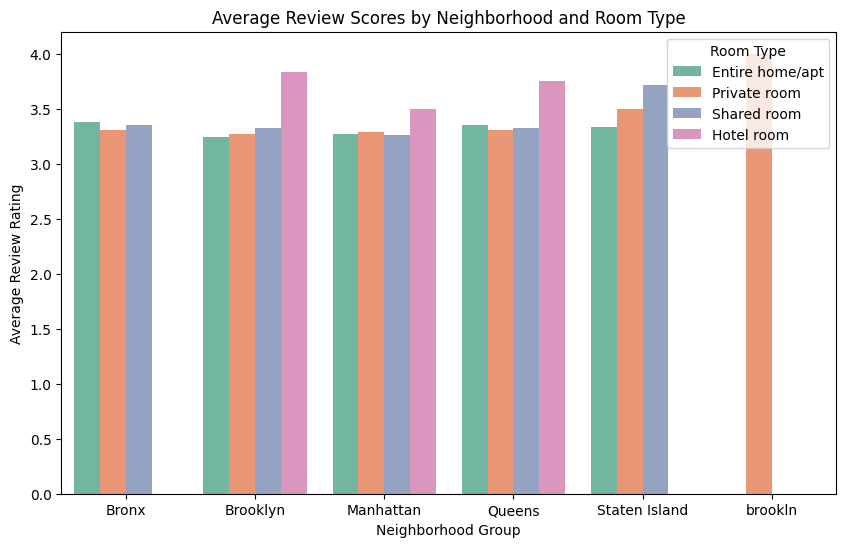

In [63]:
# Q8. Average review rate number by neighborhood and room type
if {'review rate number', 'neighbourhood group', 'room type'}.issubset(df.columns):
    avg_review = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().reset_index()
    print("🛏️ Average Review Rating by Neighborhood Group and Room Type:\n")
    print(avg_review)

    plt.figure(figsize=(10,6))
    sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=avg_review, palette='Set2')
    plt.title('Average Review Scores by Neighborhood and Room Type')
    plt.xlabel('Neighborhood Group')
    plt.ylabel('Average Review Rating')
    plt.legend(title='Room Type')
    plt.show()
else:
    print("Required columns not found.")

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📅 Correlation between Host Listing Count and Availability: nan


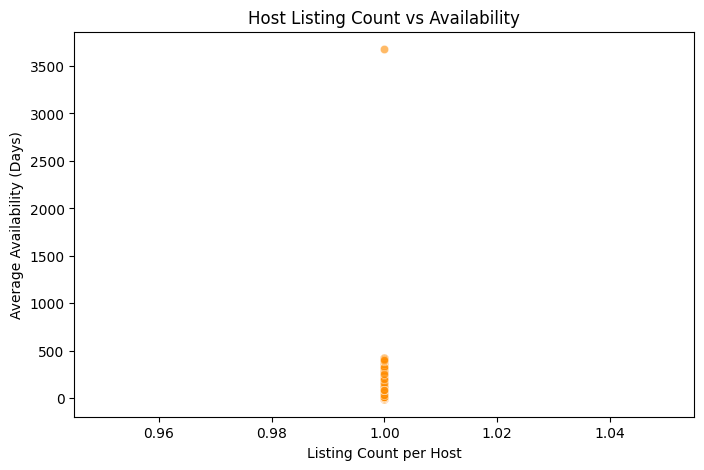

In [64]:
# Q9. Hosts with higher listing count and availability
if {'host id', 'availability 365'}.issubset(df.columns):
    host_availability = df.groupby('host id')['availability 365'].mean().reset_index()
    host_count = df['host id'].value_counts().reset_index()
    host_count.columns = ['host id', 'listing_count']
    combined = pd.merge(host_count, host_availability, on='host id')
    corr = combined['listing_count'].corr(combined['availability 365'])
    print("📅 Correlation between Host Listing Count and Availability:", round(corr, 3))

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='listing_count', y='availability 365', data=combined, alpha=0.6, color='darkorange')
    plt.title('Host Listing Count vs Availability')
    plt.xlabel('Listing Count per Host')
    plt.ylabel('Average Availability (Days)')
    plt.show()
else:
    print("Columns 'host id' or 'availability 365' not found.")